In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///F:/Data_Train.csv')
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df.value_counts()

Airline                  Date_of_Journey  Source    Destination  Route                  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info              Price
Jet Airways              27/05/2019       Delhi     Cochin       DEL → AMD → BOM → COK  19:10     19:00 28 May  23h 50m   2 stops      No info                      15129    3
                         18/05/2019       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 19 May  22h 55m   2 stops      In-flight meal not included  13029    3
Air India                24/06/2019       Delhi     Cochin       DEL → GOI → BOM → COK  22:00     19:15 25 Jun  21h 15m   2 stops      No info                      9181     3
Jet Airways              9/05/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 10 May  22h 55m   2 stops      In-flight meal not included  13029    3
                         1/06/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 02 Jun  22h 55m   2 stops 

In [12]:
df.var()

Price    2.126463e+07
dtype: float64

In [13]:
df.max()

Airline            Vistara Premium economy
Date_of_Journey                  9/06/2019
Source                              Mumbai
Destination                      New Delhi
Dep_Time                             23:55
Arrival_Time                  23:55 02 Mar
Duration                             9h 5m
Additional_Info             Red-eye flight
Price                                79512
dtype: object

In [14]:
df.min()

Airline                  Air Asia
Date_of_Journey        01/03/2019
Source                   Banglore
Destination              Banglore
Dep_Time                    00:20
Arrival_Time         00:05 02 Apr
Duration                      10h
Additional_Info    1 Long layover
Price                        1759
dtype: object

In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
df=df.fillna(0)

In [18]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])


for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)
df.head()  

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2021-06-21 22:20:00 2021-03-22 01:10:00   2h 50m    non-stop   
1 2021-06-21 05:50:00 2021-06-21 13:15:00   7h 25m     2 stops   
2 2021-06-21 09:25:00 2021-06-10 04:25:00      19h     2 stops   
3 2021-06-21 18:05:00 2021-06-21 23:30:00   5h 25m      1 stop   
4 2021-06-21 16:50:00 2021-06-21 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  
0         No info   3897  
1         No info   7662  
2         No info  13882  
3         No info   6218  
4         No info  13302

In [19]:
df['Journey_day'] = df['Date_of_Journey'].dt.day


df['Journey_month'] = df['Date_of_Journey'].dt.month

df.drop('Date_of_Journey',axis=1, inplace=True)
df.head()

Airline    Source Destination                  Route  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2021-06-21 22:20:00 2021-03-22 01:10:00   2h 50m    non-stop   
1 2021-06-21 05:50:00 2021-06-21 13:15:00   7h 25m     2 stops   
2 2021-06-21 09:25:00 2021-06-10 04:25:00      19h     2 stops   
3 2021-06-21 18:05:00 2021-06-21 23:30:00   5h 25m      1 stop   
4 2021-06-21 16:50:00 2021-06-21 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  
0         No info   3897           24              3  
1         No info   7662            5              1  
2         No info  13882            6              9  
3         No info   6218            5             12  
4         No info  13302            3              1

In [21]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour


def extract_minute(df, col):
    df[col+'_minute'] = df[col].dt.minute

# drop column    
def drop_column(df, col):
    df.drop(col, axis=1, inplace = True)
    

for i in ['Dep_Time','Arrival_Time']:
    extract_hour(df,i)
    extract_minute(df,i)
    drop_column(df, i)
    
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0    non-stop         No info   3897           24              3   
1     2 stops         No info   7662            5              1   
2     2 stops         No info  13882            6              9   
3      1 stop         No info   6218            5             12   
4      1 stop         No info  13302            3              1   

   Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
0             22               20                  1                   10  
1              5               50                 13                   15  
2              9               25                  4                   25  
3             18                5                 23                   30  
4             16               50                 21                   35

In [22]:
duration = list(df['Duration'])


x = '2h 50m'
x.split()
print(len(x.split()))

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h '+ duration[i]
            
df['Duration'] = duration # updatng duration column with updated list
df.tail()


2


Airline    Source Destination                  Route Duration  \
10678     Air Asia   Kolkata    Banglore              CCU → BLR   2h 30m   
10679    Air India   Kolkata    Banglore              CCU → BLR   2h 35m   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    3h 0m   
10681      Vistara  Banglore   New Delhi              BLR → DEL   2h 40m   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   8h 20m   

      Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
10678    non-stop         No info   4107            4              9   
10679    non-stop         No info   4145           27              4   
10680    non-stop         No info   7229           27              4   
10681    non-stop         No info  12648            3              1   
10682     2 stops         No info  11753            5              9   

       Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  
10678             19               55                 22                   25  
10679             20               45                 23                   20  
10680              8               20                 11                   20  
10681             11               30                 14                   10  
10682             10               55                 19                   15

In [23]:
print('2h 50m'.split(' ')[1][0:-1]) 

def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

df['Duration_hours'] = df['Duration'].apply(hour) 
df['Duration_minutes'] = df['Duration'].apply(minute)

drop_column(df, 'Duration') 
df.head()

50


Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  Dep_Time_hour  \
0         No info   3897           24              3             22   
1         No info   7662            5              1              5   
2         No info  13882            6              9              9   
3         No info   6218            5             12             18   
4         No info  13302            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute Duration_hours  \
0               20                  1                   10              2   
1               50                 13                   15              7   
2               25                  4                   25             19   
3                5                 23                   30              5   
4               50                 21                   35              4   

  Duration_minutes  
0               50  
1               25  
2                0  
3               25  
4               45

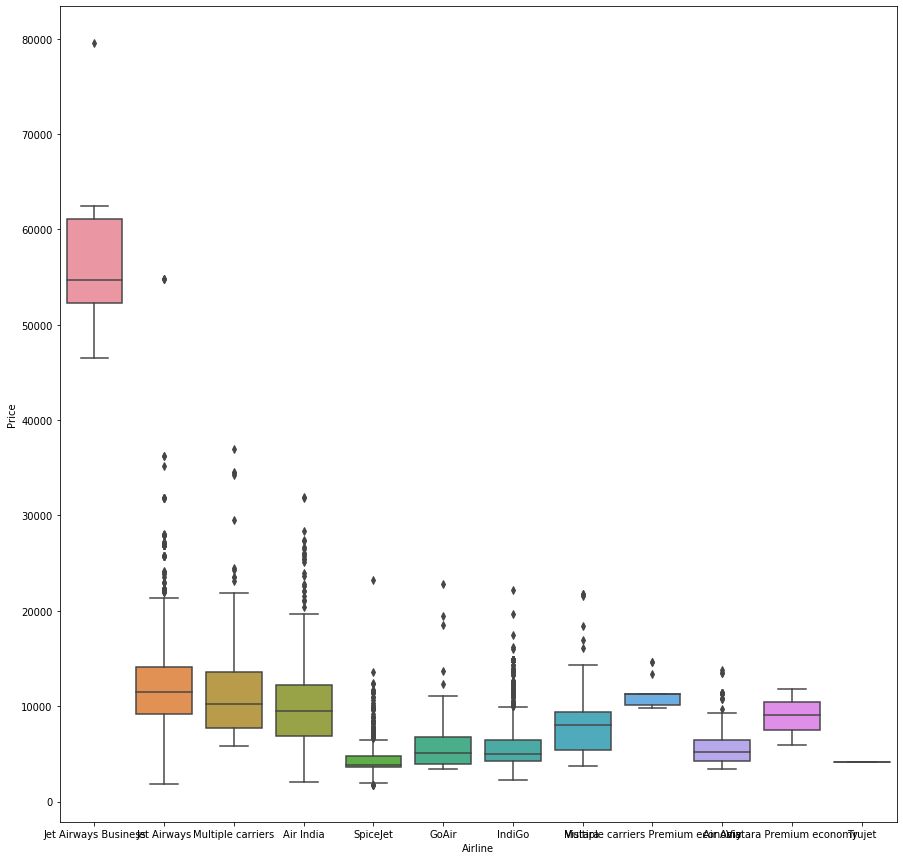

In [26]:
plt.figure(figsize = (15,15))
sns.boxplot(x = 'Airline', y = 'Price', data = df.sort_values('Price',ascending = False))

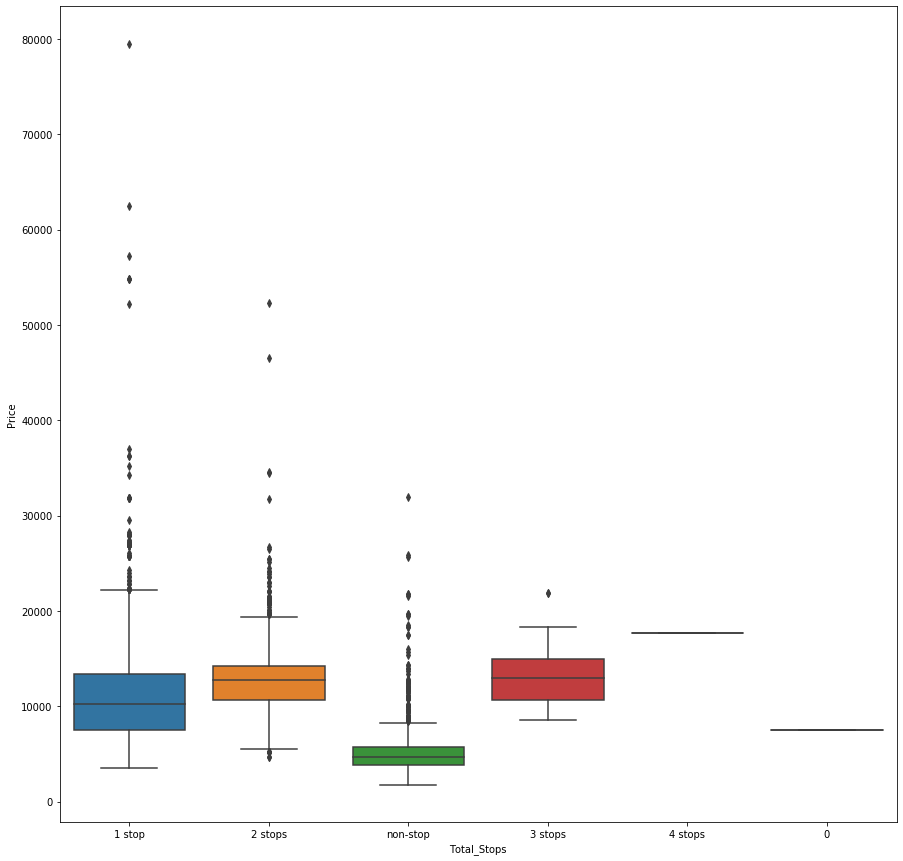

In [27]:
plt.figure(figsize = (15,15)) 
sns.boxplot(x = 'Total_Stops', y = 'Price', data = df.sort_values('Price',ascending = False))

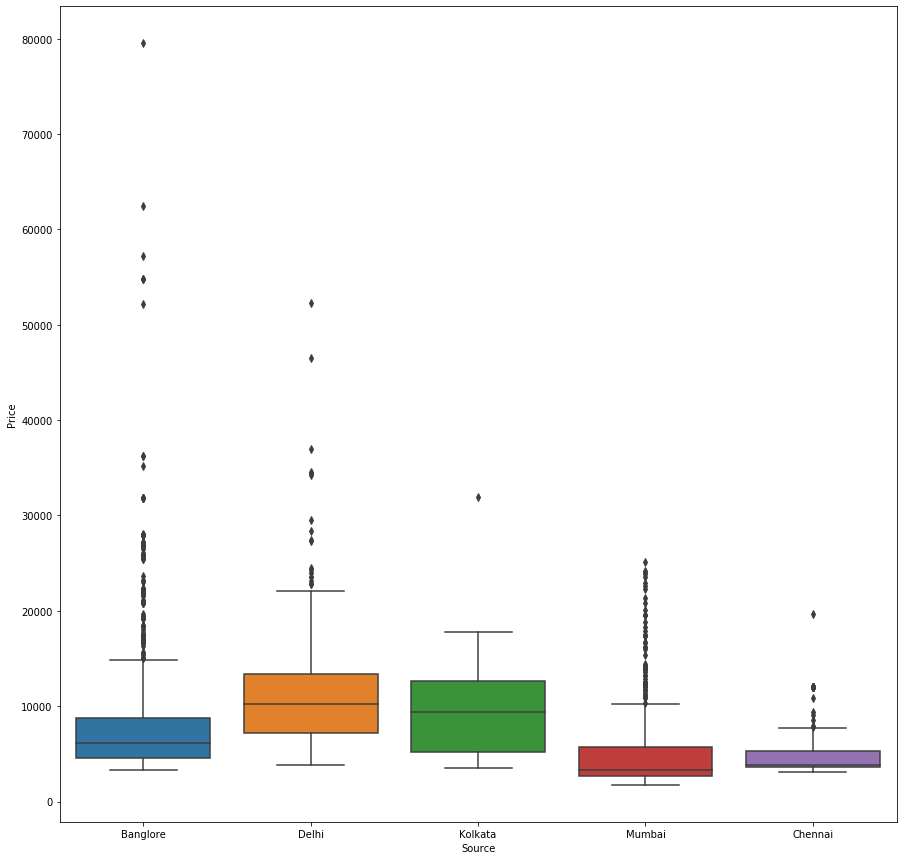

In [29]:
plt.figure(figsize = (15,15)) 
sns.boxplot(x = 'Source', y = 'Price', data = df.sort_values('Price',ascending = False))

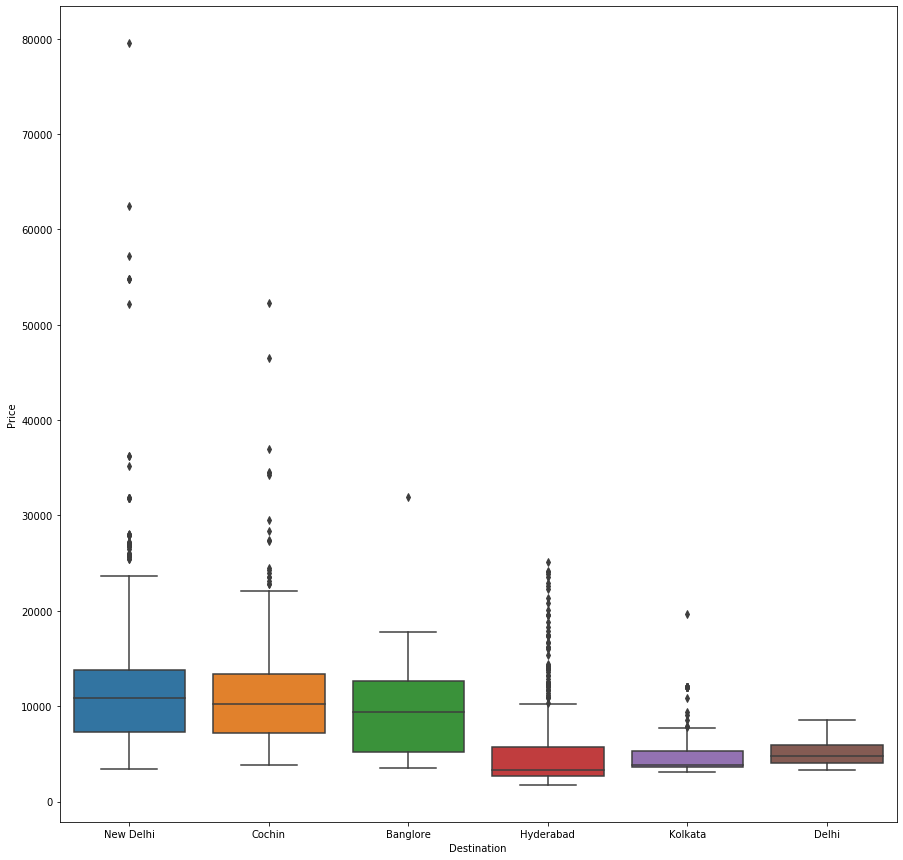

In [30]:
plt.figure(figsize = (15,15)) 
sns.boxplot(x = 'Destination', y = 'Price', data = df.sort_values('Price',ascending = False))


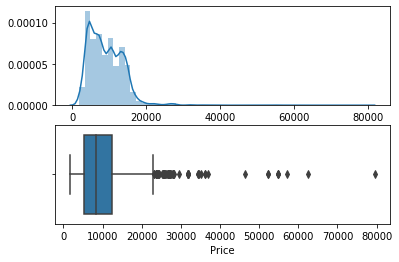

In [31]:
def plot(df, col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    
plot(df,'Price')

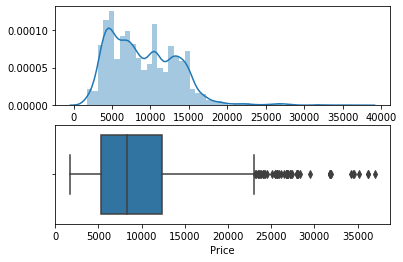

In [33]:
df['Price'] = np.where(df['Price']>=40000,df['Price'].median(),df['Price'])
 
plot(df,'Price')

In [36]:
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info    Price  Journey_day  Journey_month  Dep_Time_hour  \
0         No info   3897.0           24              3             22   
1         No info   7662.0            5              1              5   
2         No info  13882.0            6              9              9   
3         No info   6218.0            5             12             18   
4         No info  13302.0            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute Duration_hours  \
0               20                  1                   10              2   
1               50                 13                   15              7   
2               25                  4                   25             19   
3                5                 23                   30              5   
4               50                 21                   35              4   

  Duration_minutes  
0               50  
1               25  
2                0  
3               25  
4               45

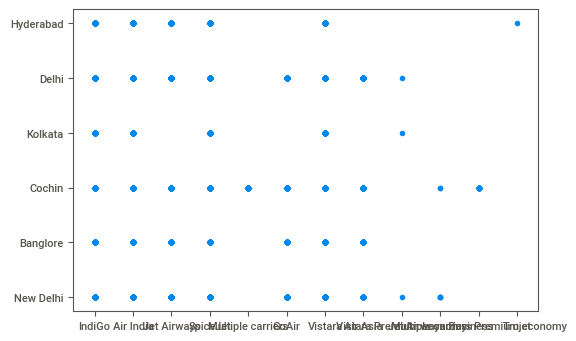

In [40]:
plt.scatter(df['Airline'],df['Destination'])

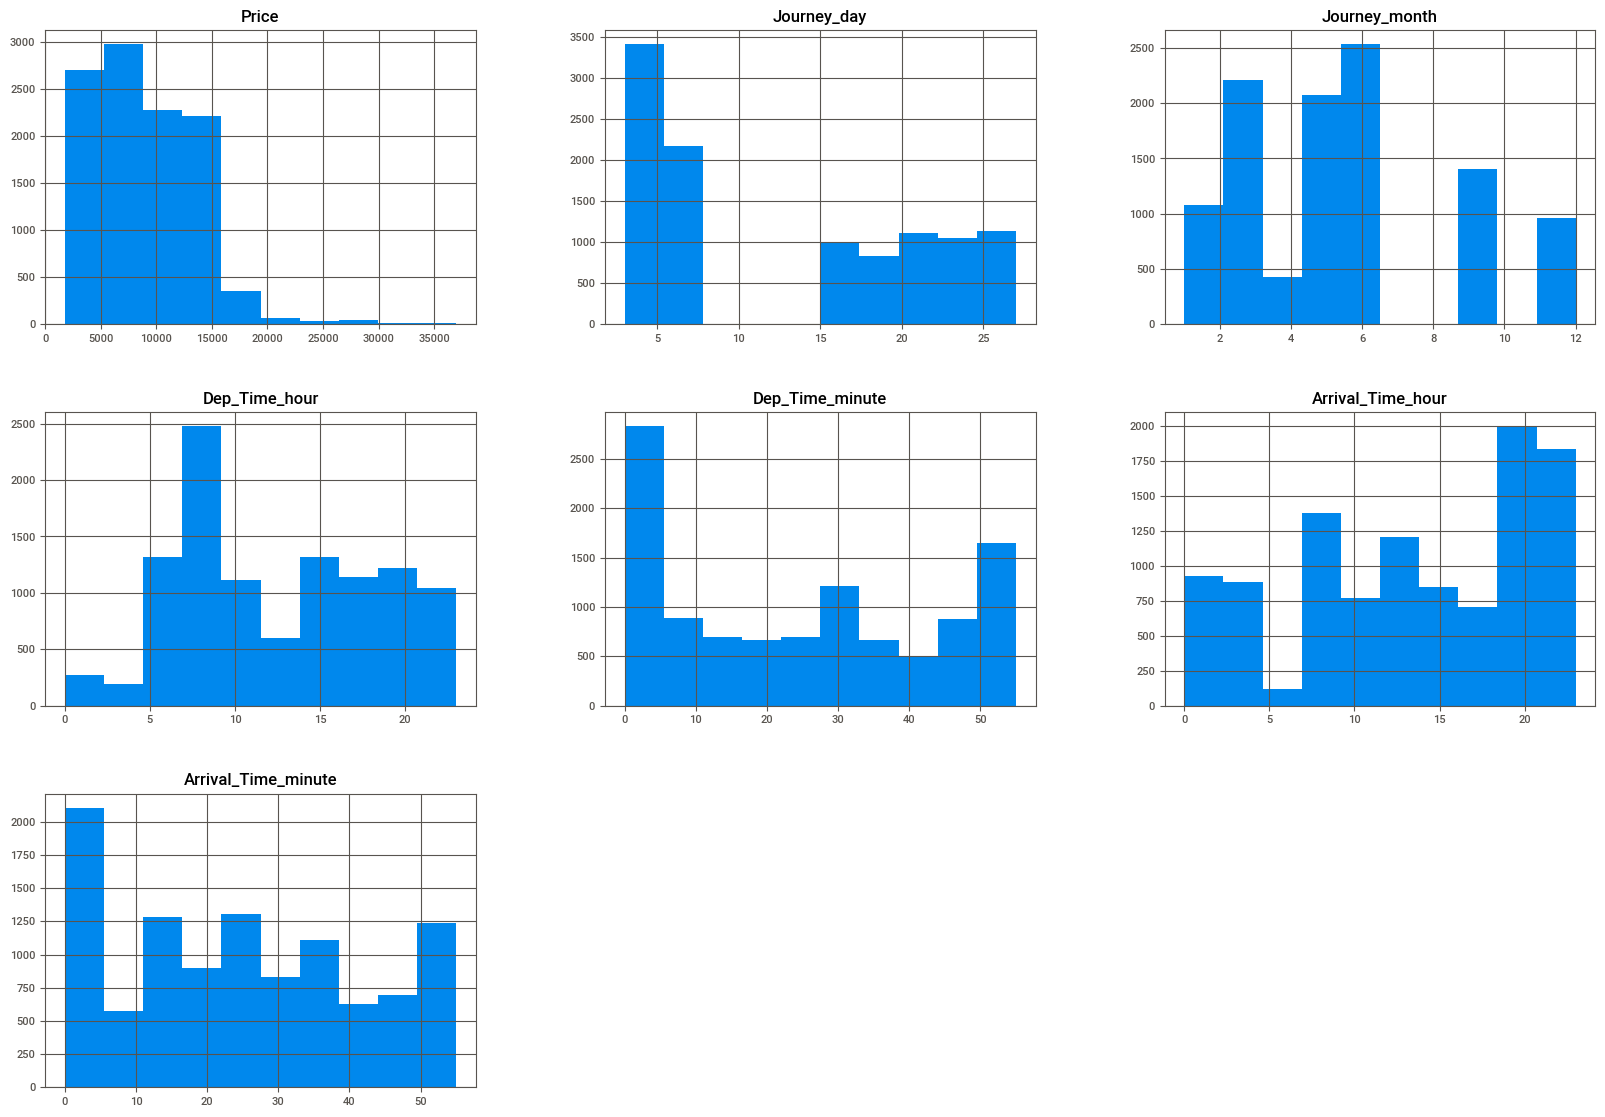

In [39]:
df.hist(figsize=(20,14))
plt.show()

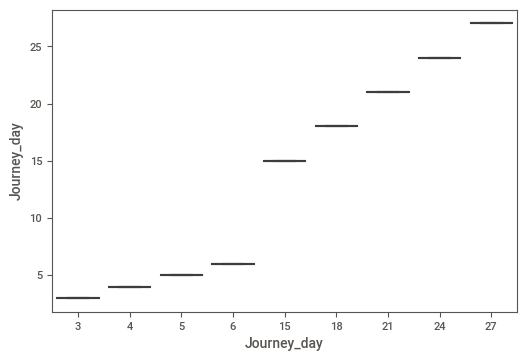

In [45]:
sns.boxplot(df['Journey_day'],df['Journey_day'])

In [46]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

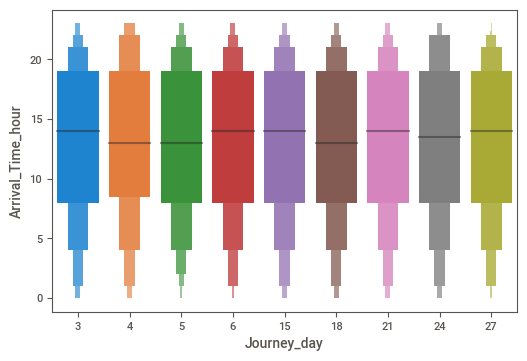

In [47]:
sns.boxenplot(df['Journey_day'],df['Arrival_Time_hour'])

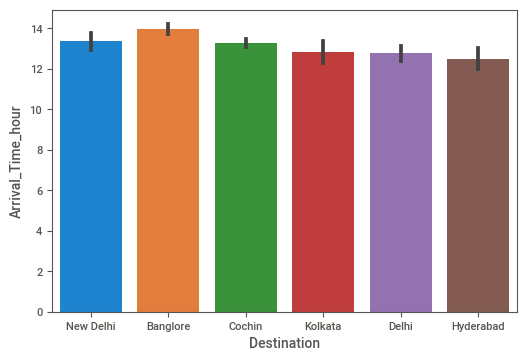

In [48]:
sns.barplot(x="Destination",y="Arrival_Time_hour",data=df)

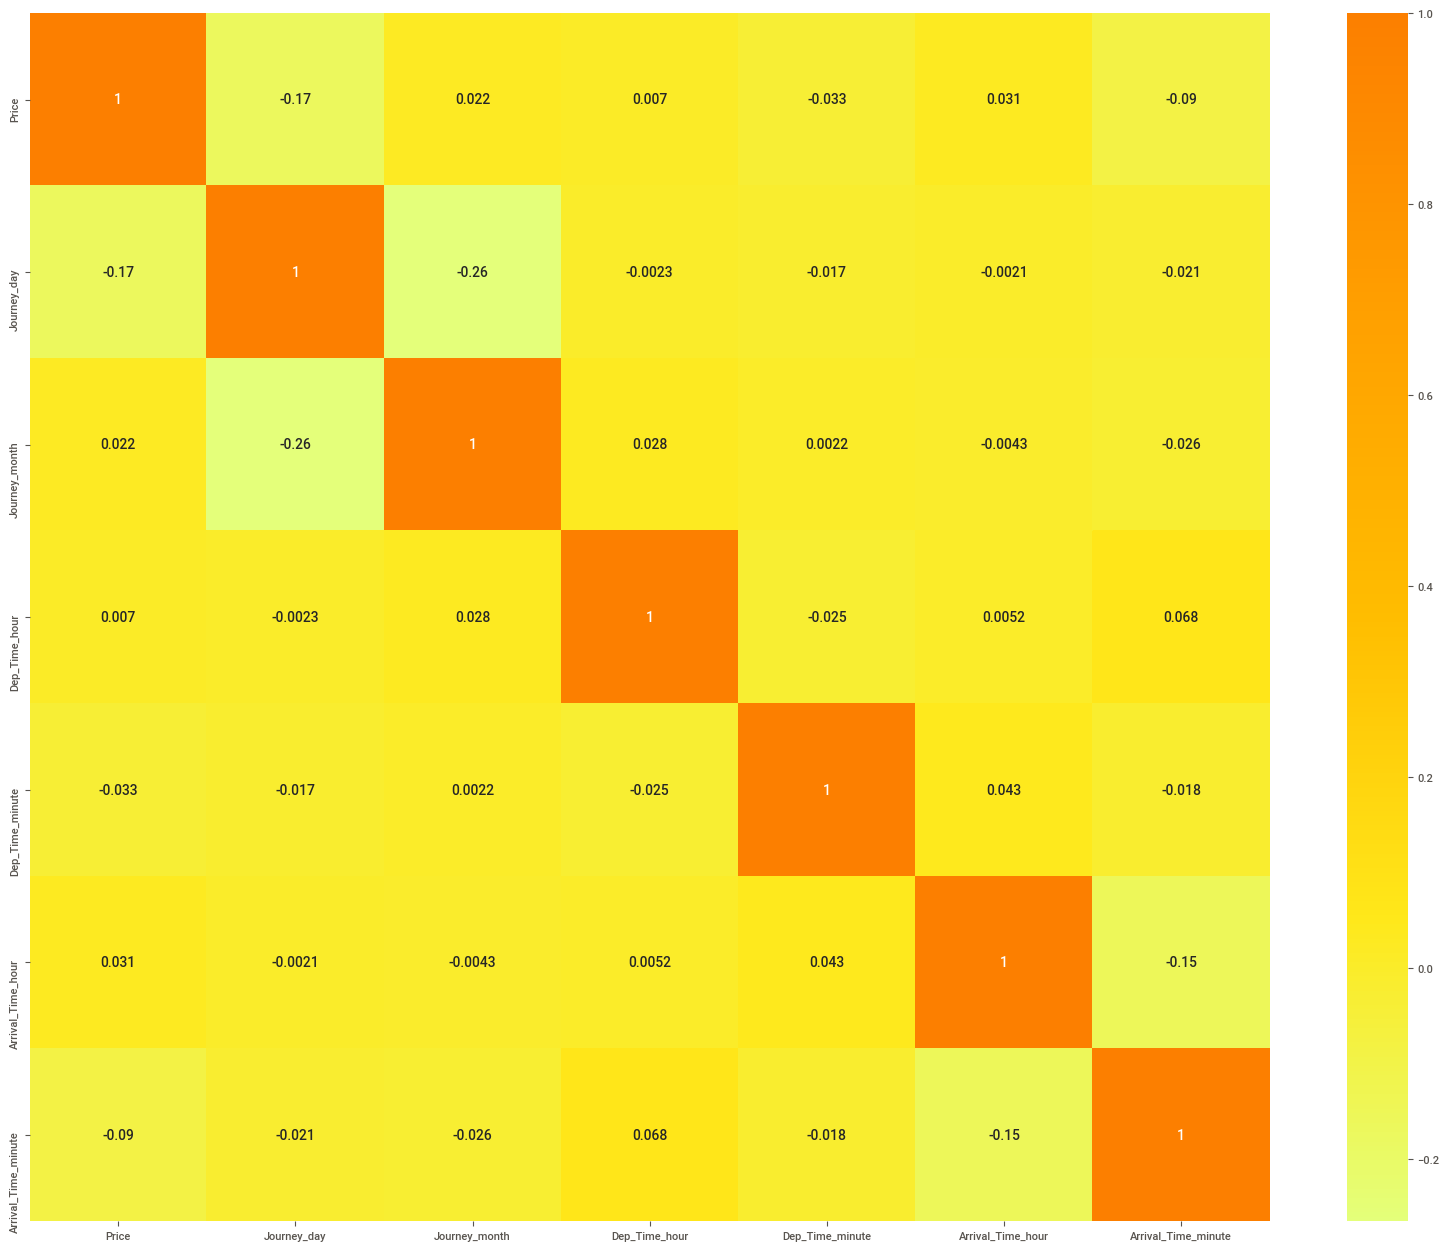

In [49]:
plt.figure(figsize=(20,16))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

In [53]:
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info    Price  Journey_day  Journey_month  Dep_Time_hour  \
0         No info   3897.0           24              3             22   
1         No info   7662.0            5              1              5   
2         No info  13882.0            6              9              9   
3         No info   6218.0            5             12             18   
4         No info  13302.0            3              1             16   

   Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute Duration_hours  \
0               20                  1                   10              2   
1               50                 13                   15              7   
2               25                  4                   25             19   
3                5                 23                   30              5   
4               50                 21                   35              4   

  Duration_minutes  
0               50  
1               25  
2                0  
3               25  
4               45

TypeError: can't multiply sequence by non-int of type 'float'

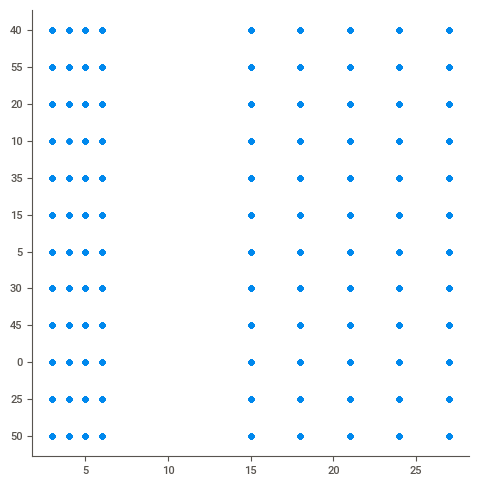

In [54]:
sns.lmplot(x="Journey_day",y="Duration_minutes",data=df)

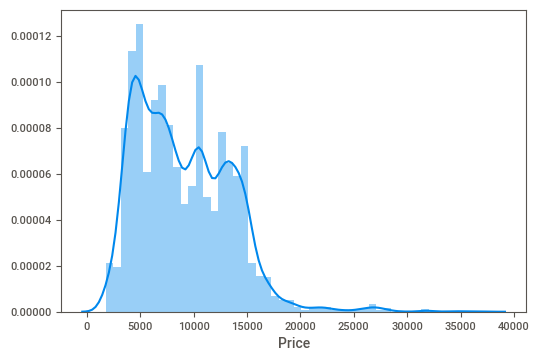

In [55]:
sns.distplot(df['Price'])

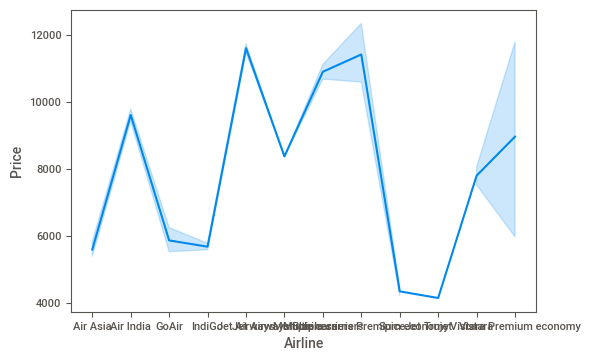

In [57]:
sns.lineplot(x="Airline",y="Price",data=df)

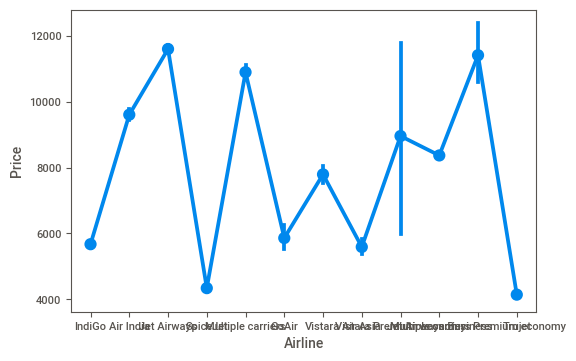

In [58]:
sns.pointplot(x="Airline",y="Price",data=df)

In [62]:
import plotly.express as px

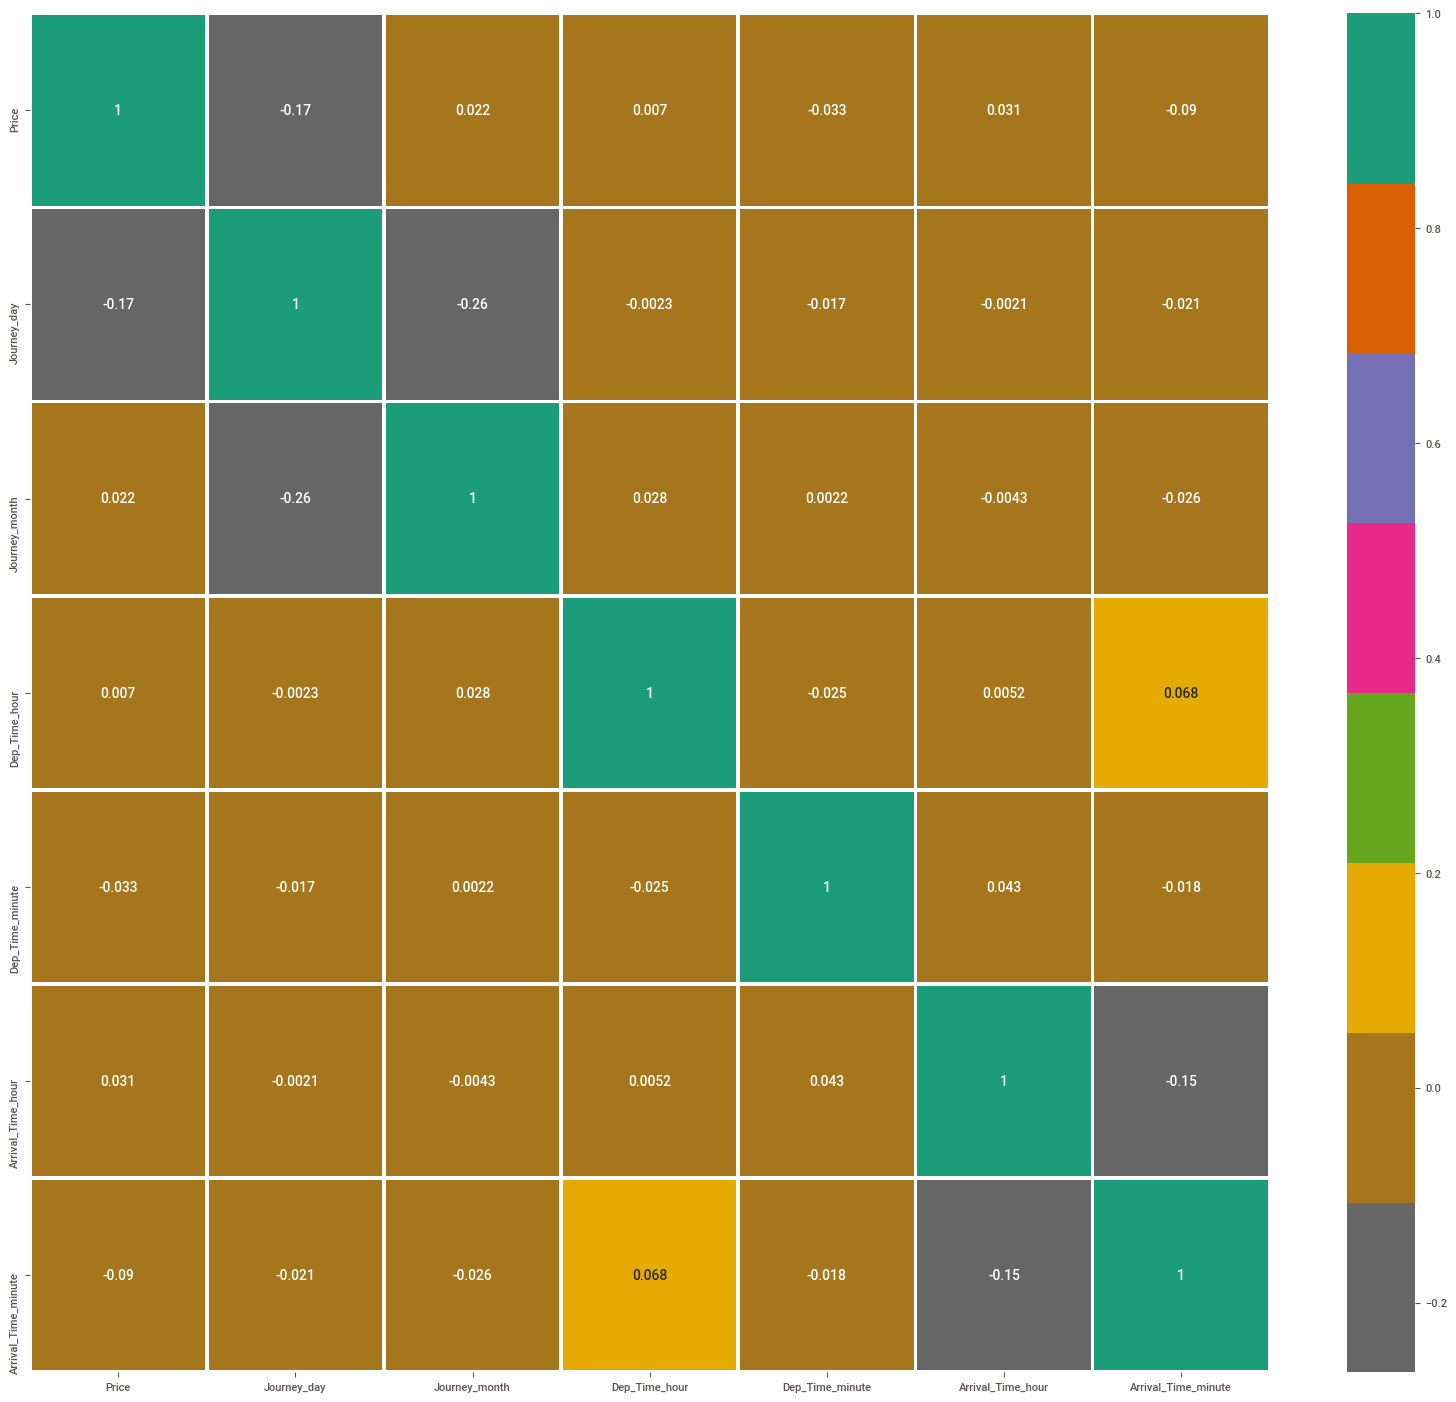

In [63]:
plt.figure(figsize=(20,18))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [64]:
fig = px.treemap(df.groupby('Airline').Price.sum().reset_index(), 
                 path=['Airline'], values='Price',
                  color='Price', hover_data=['Airline'],
                  title="XXX",
                  color_continuous_scale='RdBu')
fig.show()

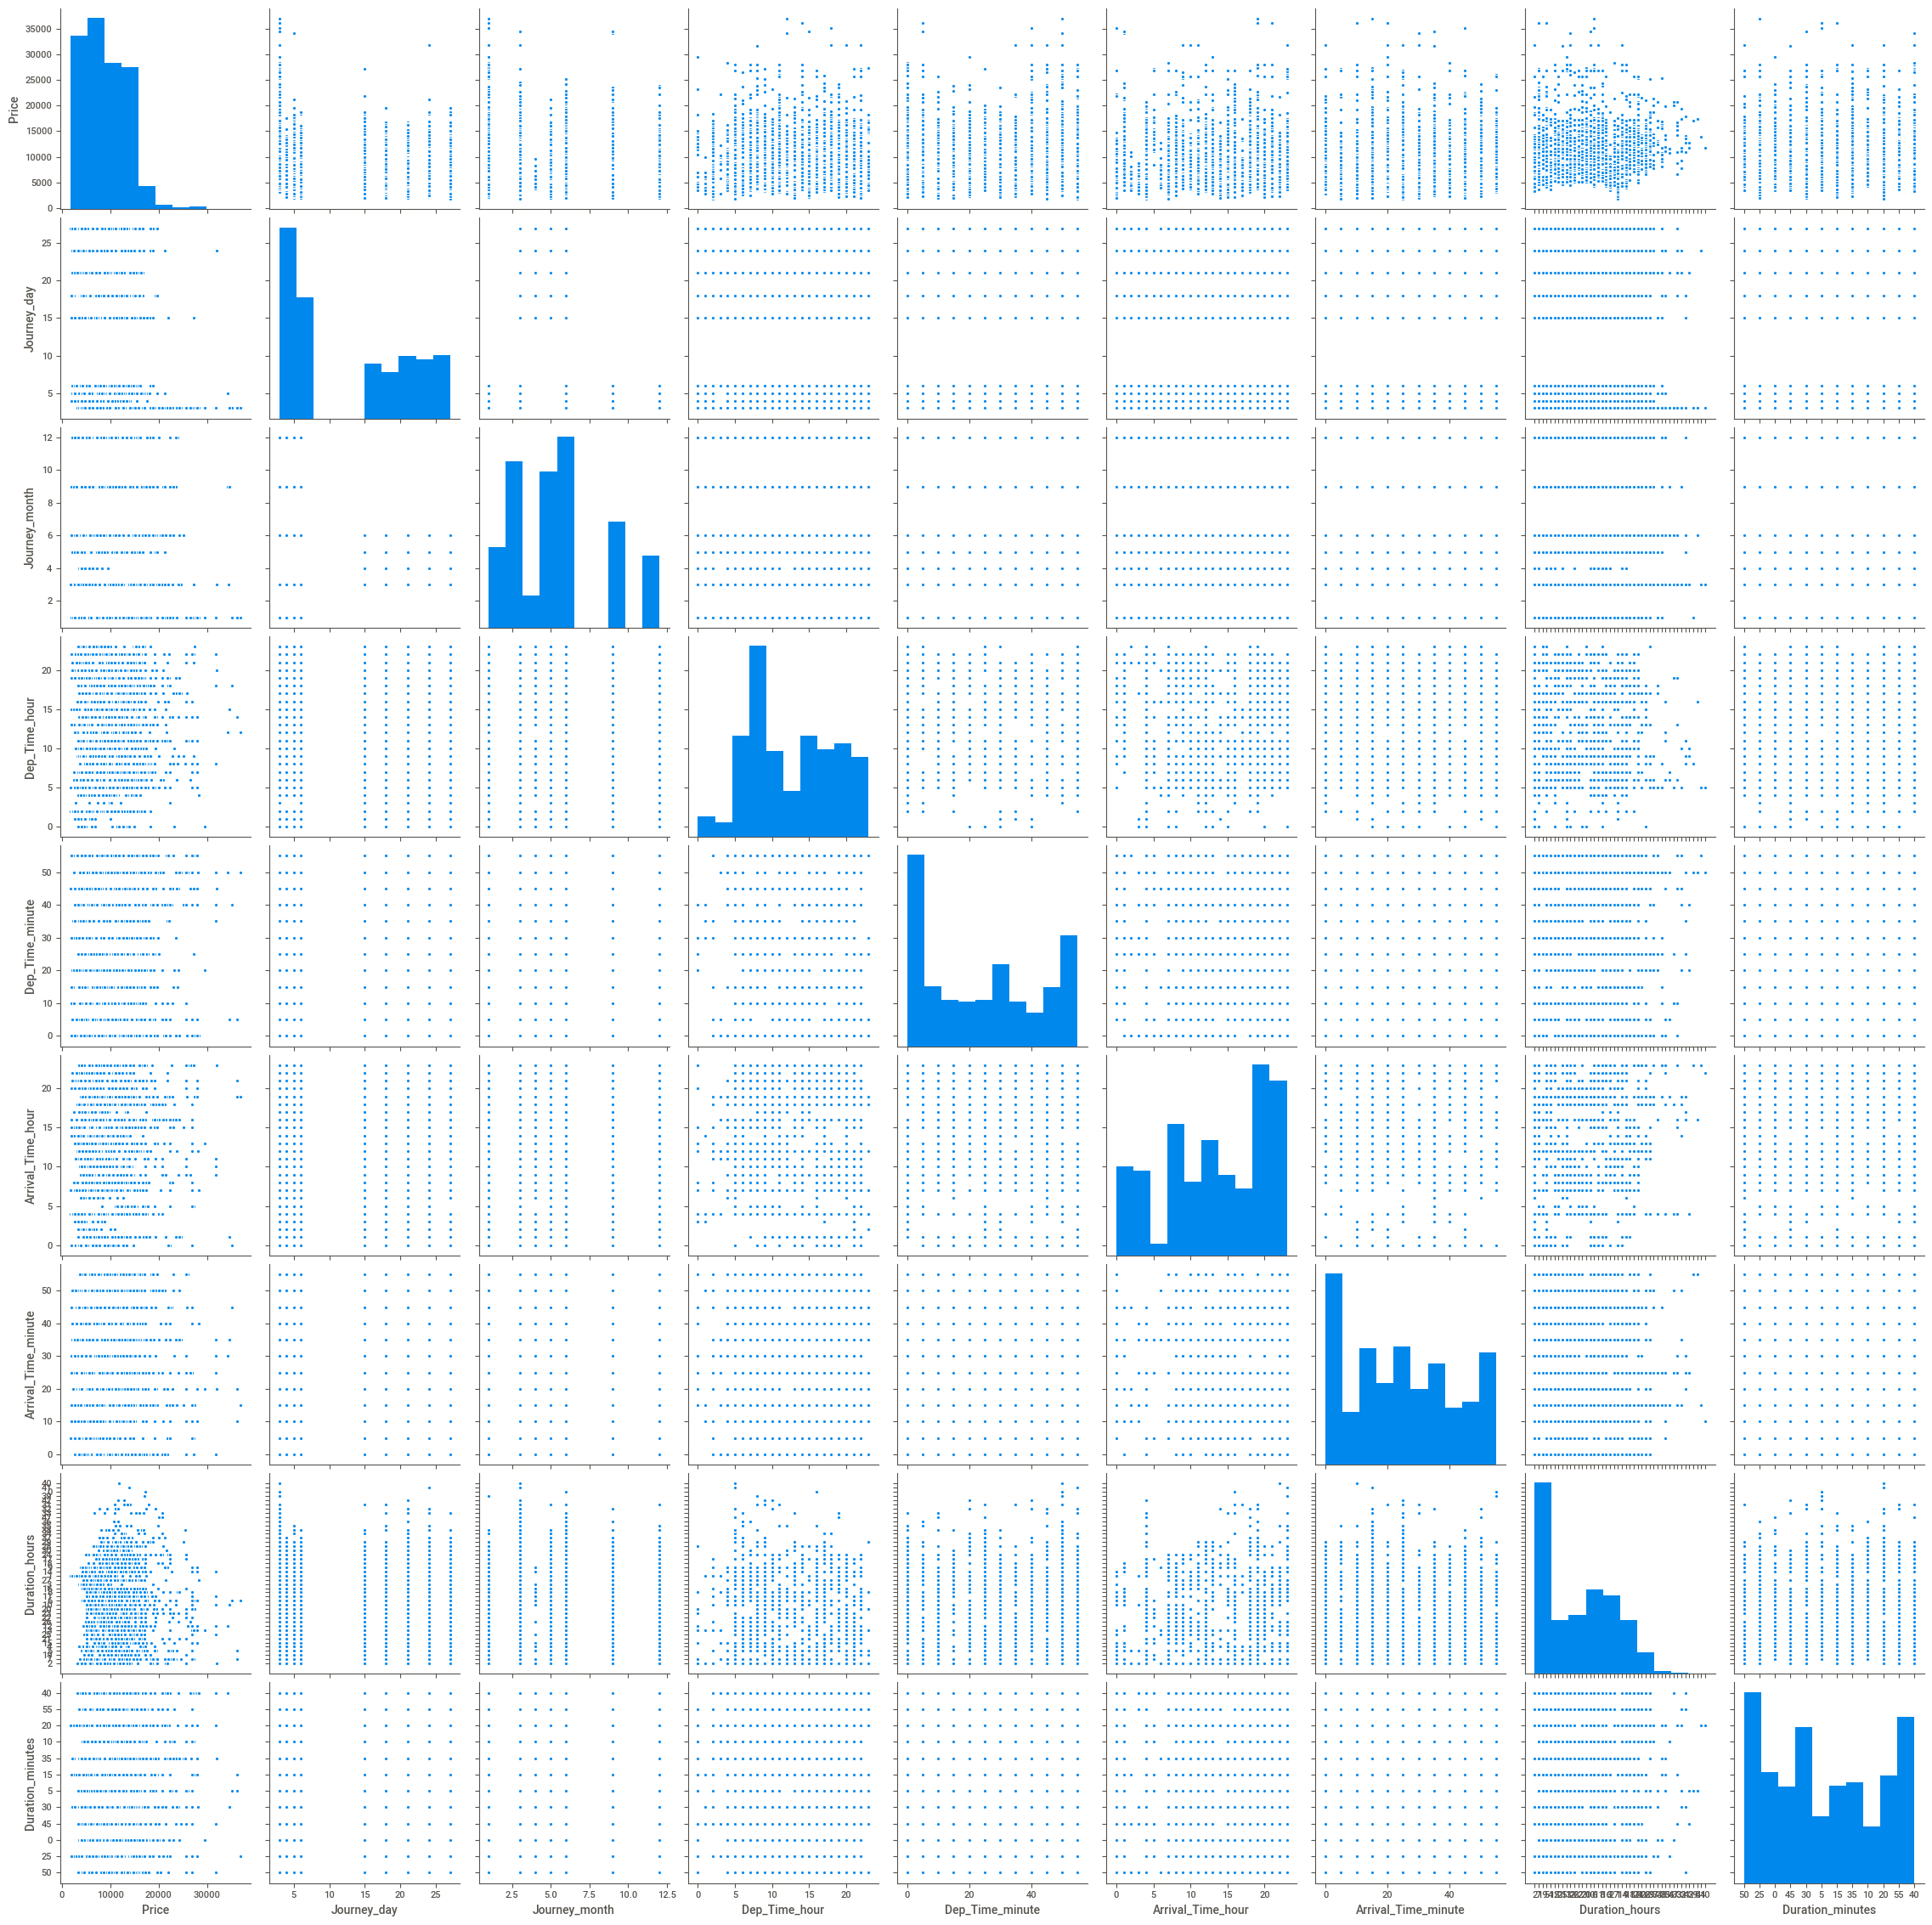

In [66]:
sns.pairplot(df)